<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Imputation" data-toc-modified-id="Data-Imputation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Imputation</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Misc.-Cleaning" data-toc-modified-id="Misc.-Cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Misc. Cleaning</a></span></li><li><span><a href="#Data-Normalization/Standardization" data-toc-modified-id="Data-Normalization/Standardization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Normalization/Standardization</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#Data-Plotting" data-toc-modified-id="Data-Plotting-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data Plotting</a></span></li></ul></li><li><span><a href="#SVM-with-PCA" data-toc-modified-id="SVM-with-PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SVM with PCA</a></span></li><li><span><a href="#Random-Forest-Parameter-Search" data-toc-modified-id="Random-Forest-Parameter-Search-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Parameter Search</a></span><ul class="toc-item"><li><span><a href="#First-Sweep---Randomized-Search-(30-configurations,-3-cv)" data-toc-modified-id="First-Sweep---Randomized-Search-(30-configurations,-3-cv)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First Sweep - Randomized Search (30 configurations, 3-cv)</a></span></li><li><span><a href="#Second-Sweep---Grid-Search-(all-grid-configurations,-3-cv)" data-toc-modified-id="Second-Sweep---Grid-Search-(all-grid-configurations,-3-cv)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Second Sweep - Grid Search (all grid configurations, 3 cv)</a></span></li><li><span><a href="#Third-Sweep---RepeatedStratifiedKFold-with-Top-Models-from-Sweep-2" data-toc-modified-id="Third-Sweep---RepeatedStratifiedKFold-with-Top-Models-from-Sweep-2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Third Sweep - RepeatedStratifiedKFold with Top Models from Sweep 2</a></span></li></ul></li></ul></div>

In [1]:
# import packages

import sys
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

#misc
import random
import time

print('-'*25)

Python version: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.23.1
matplotlib version: 2.2.2
NumPy version: 1.14.5
SciPy version: 1.1.0
scikit-learn version: 0.19.1
-------------------------


## Data Imputation

In [2]:
ColonX = pd.read_csv("ColonX.csv")
ColonX.drop('Unnamed: 0', axis = 1, inplace = True)

ColonNames = pd.read_csv("ColonNames.csv")
ColonNames.drop('Unnamed: 0', axis = 1, inplace = True)

ColonX.columns = ColonNames
ColonX.head()



,"(Hsa.3004,)","(Hsa.13491,)","(Hsa.13491,)","(Hsa.37254,)","(Hsa.541,)","(Hsa.20836,)","(Hsa.1977,)","(Hsa.44472,)","(Hsa.3087,)","(Hsa.1447,)",...,"(Hsa.2618,)","(Hsa.27285,)","(Hsa.41260,)","(Hsa.14822,)","(Hsa.336,)","(Hsa.984,)","(Hsa.35124,)","(Hsa.3952,)","(Hsa.32734,)","(Hsa.9683,)"
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,99.110714,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,152.595240,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250


In [3]:
# 40 tumor, 22 non tumor
ColonY = pd.read_csv("ColonY.csv")
ColonY.drop('Unnamed: 0', axis = 1, inplace = True)
ColonY = ColonY - 1
ColonY = np.array(ColonY).ravel()

print(ColonY)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0]


In [4]:
# ColonX dataset info
print("Number of patients: "+ str(ColonX.shape[0]))
print("Number of genes: "+str(ColonX.shape[1]))
print(ColonX.shape)

# ColonY dataset info
print("Number of patients: "+str(ColonY.shape[0]))
print(ColonY.shape)

Number of patients: 62
Number of genes: 2000
(62, 2000)
Number of patients: 62
(62,)


## Data Pre-processing


### Misc. Cleaning

In [5]:
original = len(ColonX)
ColonX = ColonX.dropna(thresh=0.5*len(ColonX.index), axis=1)
print(str(original-len(ColonX)) + " genes with >50% missing values excluded.")

0 genes with >50% missing values excluded.


In [6]:
# No missing values

ColonX.isnull().sum().sum()

0

In [7]:
# Handle duplicate genes in ColonX (columns are duplicated), no duplicate patients

colCount = ColonX.shape[1]
ColonX = ColonX.loc[:,~ColonX.columns.duplicated()]
print("Duplicate genes/columns removed: " + str(colCount - ColonX.shape[1]))

Duplicate genes/columns removed: 89


In [8]:
# Handle genes with all the same values

colCount = ColonX.shape[1]
ColonX = ColonX.drop(ColonX.std()[(ColonX.std() == 0)].index, axis=1)
print("Columns with 0 variance removed: " + str(colCount - ColonX.shape[1]))

Columns with 0 variance removed: 0


In [9]:
# Check for null/infite values

print("Check for null/infinite values: ")

print(np.any(np.isnan(ColonX)))
print(np.all(np.isfinite(ColonX)))
#print(np.any(X_train.isnull().sum() != 0))

ColonX = ColonX.dropna(axis = 1)
print("-"*20)

print("Should be false: " + str(np.any(np.isnan(ColonX))))
print("Should be true: " + str(np.all(np.isfinite(ColonX))))

Check for null/infinite values: 
False
True
--------------------
Should be false: False
Should be true: True


### Data Normalization/Standardization

In [10]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer

# Log normalization

logtransformer = FunctionTransformer(np.log1p)
ColonX = pd.DataFrame(logtransformer.transform(ColonX), 
                           index = ColonX.index, columns = ColonX.columns)

ColonX.isin([np.nan, np.inf, -np.inf]).sum().sum()

0

In [11]:
# Quantile normalization
quantiletransformer = QuantileTransformer(random_state = 0)

ColonX = pd.DataFrame(quantiletransformer.fit_transform(ColonX), 
                          index = ColonX.index, columns = ColonX.columns)


In [12]:
# Standardization
ColonX = pd.DataFrame((ColonX-ColonX.mean())/ColonX.std(),
                           index = ColonX.index, columns = ColonX.columns)


In [13]:
# Value Check
ColonX.head()
ColonX.isin([np.nan, np.inf, -np.inf]).sum().sum()

0

### SMOTE

### Data Plotting

Index([('Hsa.231',), ('Hsa.41165',), ('Hsa.18787',)], dtype='object')


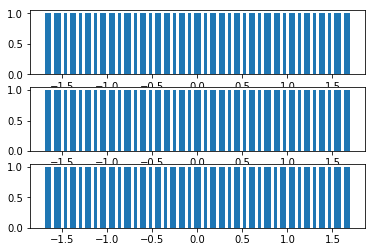

In [14]:
# Sample 9 column names from gene expression matrix
n_plots = 3

dataSample = ColonX.sample(n_plots, axis = 1).columns
print(dataSample)

# Set up plot


# Build plot
for i in range(len(dataSample)):
    plt.subplot(n_plots,1,i+1)
    plt.hist(ColonX[dataSample[i]], bins = 100)
    


## SVM with PCA

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
import itertools

from sklearn.decomposition import PCA

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


X = np.array(ColonX.copy(deep = False))
y = np.array(ColonY.copy(deep = False))

k_fold = RepeatedStratifiedKFold(3, n_repeats = 50, random_state = 100)


# Keys = classifiers, stored-values = roc_aucs
clfDict = {SVC(kernel = "linear", C = 0.001) : [],
           KNeighborsClassifier(n_neighbors = 3, p = 2): [],
           RandomForestClassifier(n_estimators= 300, min_samples_split= 2,
                                  min_samples_leaf= 1, max_features= None,
                                  max_depth= None, bootstrap= True) : [],
           GaussianNB() : []
          }




In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [ ]:
# Perform 3-fold cross validation n times for all classifiers

for clf in clfDict.keys():
    
    k = 1
    for k, (train, test) in enumerate(k_fold.split(X, y)):

        pca = PCA(n_components = 200)
        pca.fit(X[train])
        # Careful not to change X explicitly
        X_train_PCA = pca.transform(X[train].copy())
        X_test_PCA = pca.transform(X[test].copy())

        clf.fit(X_train_PCA, y[train])
        y_pred = clf.predict(X_test_PCA)
        ###accuracy = clf.score(X_test_PCA, y[test])
        
        roc_auc = roc_auc_score(y[test], y_pred)
        clfDict[clf].append(roc_auc)


        '''
        print("[fold {0}] PCA, accuracy: {1:.5f}, ROC_AUC: {2:.5f}".
              format(k, accuracy, roc_auc))


        # Plot confusion matrix
        print(confusion_matrix(y[test], y_pred))
        cm = confusion_matrix(y[test], y_pred)/y[test].shape[0]
        print(cm)
        '''    
        


        ###print("-"*50)
        k+=1

In [ ]:
results = pd.DataFrame.from_dict(clfDict)
results.columns = ["SVM", "KNN", "RF", "NB"]
results.mean()

## Random Forest Parameter Search

### First Sweep - Randomized Search (30 configurations, 3-cv)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

#------------------------------
# Random Forest Parameters


# Number of trees in random forest
n_estimators = [120, 300, 500, 800, 1200]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, 30, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# RandomSearch Grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Base model
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 30, cv = 3, verbose = 1, scoring = "roc_auc",
                               random_state = 0, n_jobs = -1)

# Fit rf_random model
rf_random.fit(ColonX, ColonY)


In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)

In [ ]:
cv_results = pd.DataFrame(rf_random.cv_results_)
print(cv_results.columns)
display(cv_results.sort_values(by="rank_test_score"))

In [ ]:
import pickle
cv_results.to_pickle("RFSweep1")


### Second Sweep - Grid Search (all grid configurations, 3 cv)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

#------------------------------
# Random Forest Parameters


# Number of trees in random forest
n_estimators = [120, 300, 500, 800]
# Number of features to consider at every split
max_features = ['sqrt', None]
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# GridSearch Grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid)

In [ ]:
rf_grid = GridSearchCV(rf, grid, cv = 3, verbose = 1, n_jobs = 2, scoring = "f1")
rf_grid.fit(ColonX, ColonY)

In [ ]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

In [ ]:
cv_results2 = pd.DataFrame(rf_grid.cv_results_)
print(cv_results2.columns)
cv_results2 = cv_results2.sort_values(by="rank_test_score")
display(cv_results2.sort_values(by="rank_test_score"))

In [ ]:
import pickle
cv_results2.to_pickle("RFSweep2")

### Third Sweep - RepeatedStratifiedKFold with Top Models from Sweep 2

In [24]:
# Packages needed for running Third Sweep only

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [25]:
for i in range(5):
    print(cv_results2["params"][i])


NameError: name 'cv_results2' is not defined

In [26]:
X = np.array(ColonX.copy(deep = False))
y = np.array(ColonY.copy())

In [27]:
k_fold_rf  = RepeatedStratifiedKFold(3, n_repeats  = 20, random_state  = 100)


# Keys  = classifiers, stored-values  = roc_aucs
clfDict = { RandomForestClassifier(bootstrap = True, max_depth = 5,
                                   max_features = "sqrt", min_samples_leaf = 2,
                                   min_samples_split = 2, n_estimators = 120)  : [],
           RandomForestClassifier(bootstrap = True, max_depth = 5,
                                  max_features = "sqrt", min_samples_leaf = 2,
                                  min_samples_split = 2, n_estimators = 300)  : [],
           RandomForestClassifier(bootstrap = True, max_depth = 5,
                                  max_features = "sqrt", min_samples_leaf = 2,
                                  min_samples_split = 2, n_estimators = 500) : [],
           RandomForestClassifier(bootstrap = True, max_depth = 5, 
                                 max_features = "sqrt", min_samples_leaf = 2, 
                                 min_samples_split = 2, n_estimators = 800)  : [],
           RandomForestClassifier(bootstrap = True, max_depth = 5,
                                 max_features = "sqrt", min_samples_leaf = 2,
                                 min_samples_split = 5, n_estimators = 120)  : []
          }

In [28]:
from tqdm import tqdm

for clf in tqdm(clfDict.keys()):

    k = 1
    for k, (train, test) in enumerate(k_fold_rf.split(X, y)):

        pca = PCA(n_components = 200)
        pca.fit(X[train])
        # Careful not to change X explicitly
        X_train_PCA = pca.transform(X[train].copy())
        X_test_PCA = pca.transform(X[test].copy())

        clf.fit(X_train_PCA, y[train])
        y_pred = clf.predict(X_test_PCA)
        ###accuracy = clf.score(X_test_PCA, y[test])

        roc_auc = roc_auc_score(y[test], y_pred)
        clfDict[clf].append(roc_auc)


        '''
        print("[fold {0}] PCA, accuracy: {1:.5f}, ROC_AUC: {2:.5f}".
              format(k, accuracy, roc_auc))


        # Plot confusion matrix
        print(confusion_matrix(y[test], y_pred))
        cm = confusion_matrix(y[test], y_pred)/y[test].shape[0]
        print(cm)
        '''    



        ###print("-"*50)
        k+=1

100%|██████████| 5/5 [02:17<00:00, 27.58s/it]


In [31]:
results = pd.DataFrame.from_dict(clfDict)
print(results)
#results.columns = ["1", "2", "3", "4", "5"]
#results.mean()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

